## US Regional Sales Data

<b>Model Developed by </b><br>
Name: <b>Umair Ali</b> <br>
Contact: <b>+923480233673</b><br>
Email: <b>uape00@gmail.com</b><br>
Blog: <b>http://umair.dahielit.com</b><br>
GitHub: <b> https://github.com/1umairali/models</b>

In [1]:
import numpy as np  # for numeric calculation
import pandas as pd  # for data analysis and manupulation
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for data visualization
import calendar

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#import dataset
url = "https://raw.githubusercontent.com/1umairali/models/main/us_regional_sales_data/us_regional_sales_data_dataset.csv"
df = pd.read_csv(url)
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [4]:
# check null values
df.isnull().sum()

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64

In [5]:
# remove ',' from 'Unit Cost' and 'Unit Price' Column
df['Unit Cost']=df['Unit Cost'].str.replace(",", "")
df['Unit Price']=df['Unit Price'].str.replace(",", "")
# end

# Convert 'Unit Cost' and 'Unit Price' Columns to float
df['Unit Cost'] = df['Unit Cost'].astype('float')
df['Unit Price'] = df['Unit Price'].astype('float')
# end

# convert columns to datetime
df['ProcuredDate'] =pd.to_datetime(df['ProcuredDate'], format='%d/%m/%y') 
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d/%m/%y')
df['ShipDate'] = pd.to_datetime(df['ShipDate'], format='%d/%m/%y')
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'], format='%d/%m/%y')
# end

In [6]:
# separate day, months and year from following columns to new columns
df['proc_date_day'] = df['ProcuredDate'].dt.strftime('%d')
df['proc_date_month'] = df['ProcuredDate'].dt.strftime('%m')
df['proc_date_year'] = df['ProcuredDate'].dt.year

df['order_date_day'] = df['OrderDate'].dt.strftime('%d')
df['order_date_month'] = df['OrderDate'].dt.strftime('%m')
df['order_date_year'] = df['OrderDate'].dt.year

df['ship_date_day'] = df['ShipDate'].dt.strftime('%d')
df['ship_date_month'] = df['ShipDate'].dt.strftime('%m')
df['ship_date_year'] = df['ShipDate'].dt.year

df['deli_date_day'] = df['DeliveryDate'].dt.strftime('%d')
df['deli_date_month'] = df['DeliveryDate'].dt.strftime('%m')
df['deli_date_year'] = df['DeliveryDate'].dt.year
#end

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

In [7]:
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,proc_date_year,order_date_day,order_date_month,order_date_year,ship_date_day,ship_date_month,ship_date_year,deli_date_day,deli_date_month,deli_date_year
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,2017,31,05,2018,14,06,2018,19,06,2018
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,...,2017,31,05,2018,22,06,2018,02,07,2018
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,...,2017,31,05,2018,21,06,2018,01,07,2018
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,...,2017,31,05,2018,02,06,2018,07,06,2018
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,...,2018,31,05,2018,16,06,2018,26,06,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,2020-09-26,2020-12-30,2021-01-07,2021-01-14,USD,9,41,...,2020,30,12,2020,07,01,2021,14,01,2021
7987,SO - 0008088,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-02,2021-01-04,USD,14,29,...,2020,30,12,2020,02,01,2021,04,01,2021
7988,SO - 0008089,Online,WARE-UHY1004,2020-09-26,2020-12-30,2021-01-23,2021-01-26,USD,14,32,...,2020,30,12,2020,23,01,2021,26,01,2021
7989,SO - 0008090,Online,WARE-NMK1003,2020-09-26,2020-12-30,2021-01-20,2021-01-25,USD,20,42,...,2020,30,12,2020,20,01,2021,25,01,2021


In [8]:
# check for how many days product placed in store

df['placed_product_in_store'] = (df['OrderDate'] - df['ProcuredDate']).dt.days
after_day_product_sold = df[['OrderNumber','ProcuredDate','OrderDate','placed_product_in_store']]
after_day_product_sold

,OrderNumber,ProcuredDate,OrderDate,placed_product_in_store
0,SO - 000101,2017-12-31,2018-05-31,151
1,SO - 000102,2017-12-31,2018-05-31,151
2,SO - 000103,2017-12-31,2018-05-31,151
3,SO - 000104,2017-12-31,2018-05-31,151
4,SO - 000105,2018-04-10,2018-05-31,51
...,...,...,...,...
7986,SO - 0008087,2020-09-26,2020-12-30,95
7987,SO - 0008088,2020-09-26,2020-12-30,95
7988,SO - 0008089,2020-09-26,2020-12-30,95
7989,SO - 0008090,2020-09-26,2020-12-30,95


## Data Visualization

### warehouses

In [9]:
# total _Store_ID 
df['_StoreID'].nunique()

367

<function matplotlib.pyplot.show(close=None, block=None)>

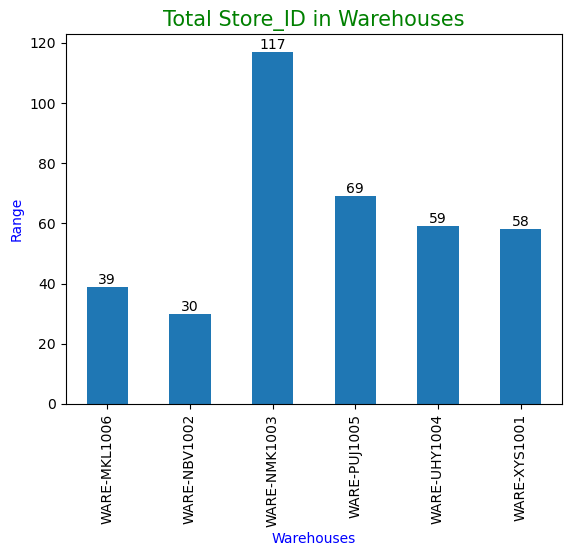

In [10]:
# total Store id in warehouses

store_in_warehouses = df.groupby('WarehouseCode', sort=True)['_StoreID'].nunique()
ax = store_in_warehouses.plot.bar()

#label on bars
ax.bar_label(ax.containers[0], fmt = '%d')
plt.show

# title and labels
plt.title('Total Store_ID in Warehouses',fontsize = 15, color='green')
plt.xlabel('Warehouses',fontsize = 10,color='blue')
plt.ylabel('Range',fontsize = 10,color='blue')
plt.show

Text(0, 0.5, 'Product Range')

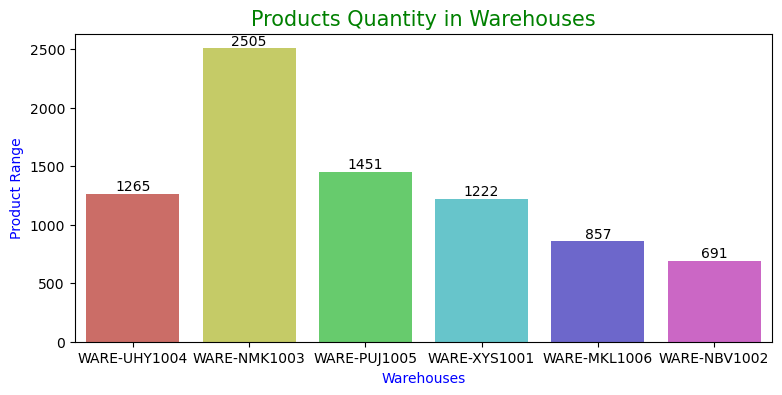

In [11]:
# Products Quantity in Warehouses
plt.figure(figsize=(9,4))
df['WarehouseCode'].value_counts()
ax = sns.countplot(x=df['WarehouseCode'], palette='hls')

#values on bar
for i in ax.containers:
    ax.bar_label(i,)
    
# title and labels
plt.title('Products Quantity in Warehouses',fontsize = 15, color='green')
plt.xlabel('Warehouses',fontsize = 10,color='blue')
plt.ylabel('Product Range',fontsize = 10,color='blue')

### Sales channel

Text(0, 0.5, 'Products Count')

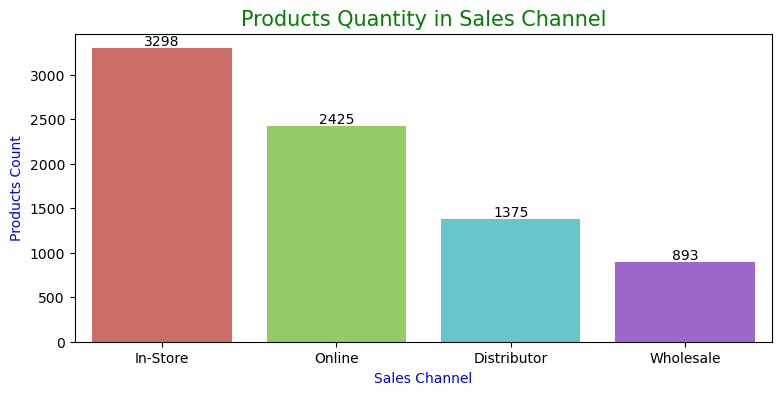

In [12]:
# Products quantity in sales channel
plt.figure(figsize=(9,4))
df['Sales Channel'].value_counts()
ax = sns.countplot(x=df['Sales Channel'], palette='hls')

#values on bar
for i in ax.containers:
    ax.bar_label(i,)
    
# title and labels
plt.title('Products Quantity in Sales Channel',fontsize = 15, color='green')
plt.xlabel('Sales Channel',fontsize = 10,color='blue')
plt.ylabel('Products Count',fontsize = 10,color='blue')

### Product

In [13]:
# total products
df['_ProductID'].nunique()

47

Text(0, 0.5, 'Range')

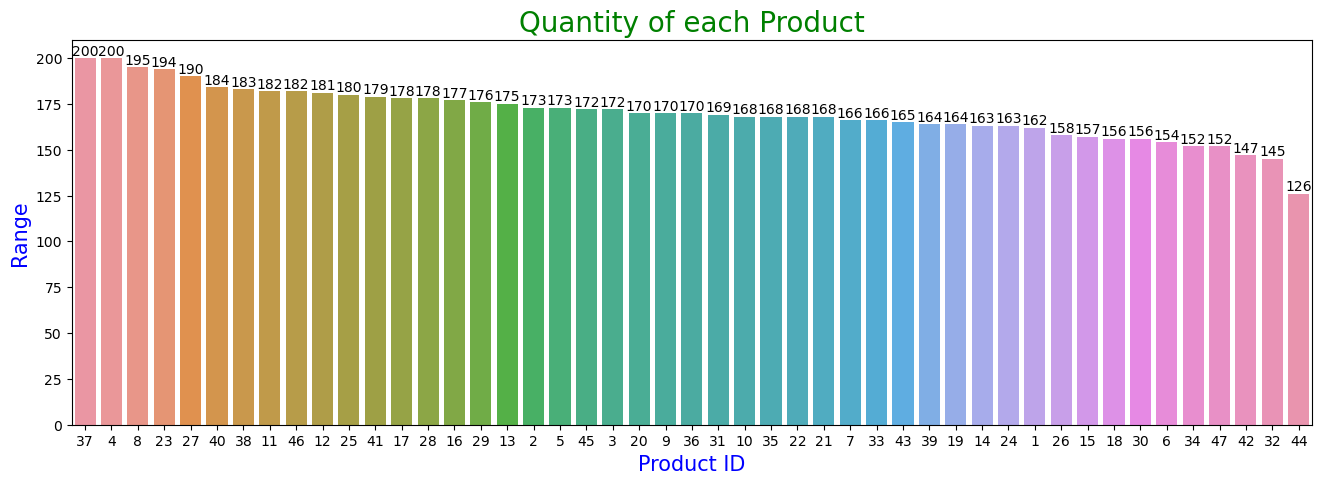

In [14]:
# Available Product Quantity
plt.figure(figsize=(16,5))
df['_ProductID'].value_counts()
ax = sns.countplot(x=df['_ProductID'], order=df['_ProductID'].value_counts(ascending=False).index)

# values on bars
for i in ax.containers:
    ax.bar_label(i,)

# title and labels
plt.title('Quantity of each Product',fontsize = 20, color='green')
plt.xlabel('Product ID',fontsize = 15,color='blue')
plt.ylabel('Range',fontsize = 15,color='blue')

C:\Users\Umair Ali\AppData\Local\Temp\ipykernel_10228\4088005391.py:3: FutureWarning: The provided callable <function sum at 0x000002B6E7EA71A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_by_year = group_order_year['Unit Price'].agg([np.sum]).reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

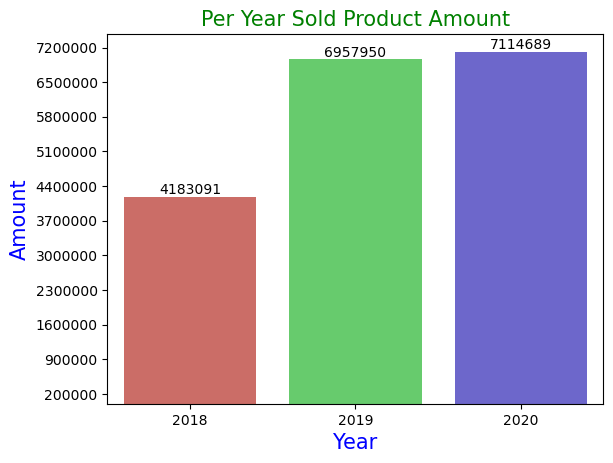

In [15]:
# Per Year Order/Sale in amount
group_order_year= df.groupby(['order_date_year'])
total_by_year = group_order_year['Unit Price'].agg([np.sum]).reset_index()
ax = sns.barplot(x = total_by_year['order_date_year'], y = total_by_year['sum'],palette = 'hls')


#yticks in complete figures
y_ticks = np.arange(200000, 7300000, 700000)
plt.yticks(y_ticks)
plt.ticklabel_format(style='plain', axis='y')

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d')

# title and labels
plt.title('Per Year Sold Product Amount',fontsize = 15, color='green')
plt.xlabel('Year',fontsize = 15,color='blue')
plt.ylabel('Amount',fontsize = 15,color='blue')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

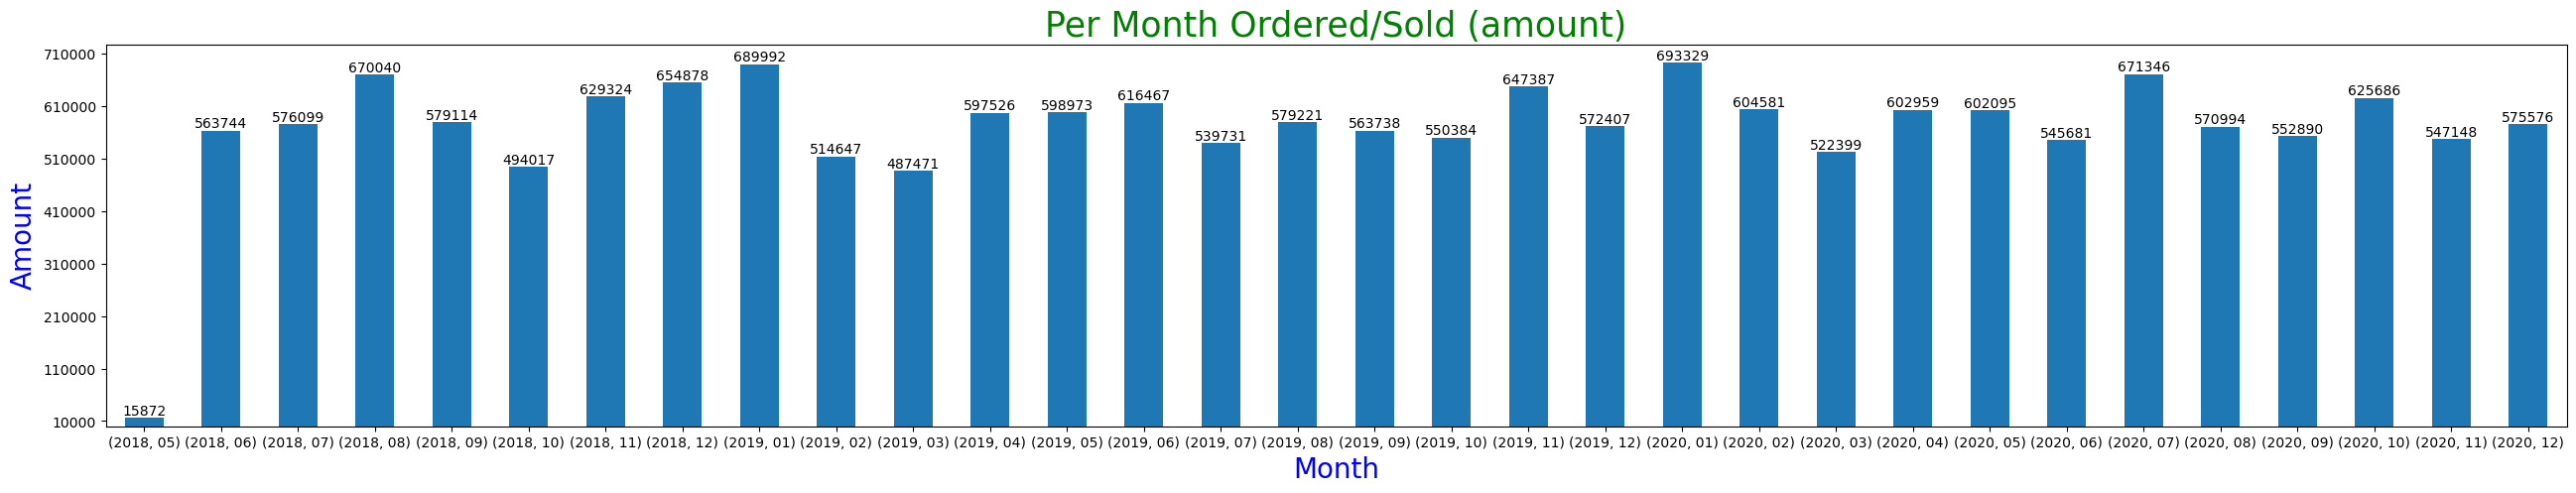

In [16]:
# Per Month Order/Sale in amount

plt.figure(figsize=(32,5))
group_order_month_year = df.groupby(['order_date_year','order_date_month'])['Unit Price'].sum()
ax=group_order_month_year.plot(kind='bar' ,x='order_date_month',y='sum',rot=0,  legend=False)

#yticks in complete figures
y_ticks = np.arange(10000, 800000, 100000)
plt.yticks(y_ticks)
plt.ticklabel_format(style='plain', axis='y')

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d')

# title and labels
plt.title('Per Month Ordered/Sold (amount)',fontsize = 25, color='green')
plt.xlabel('Month',fontsize = 20,color='blue')
plt.ylabel('Amount',fontsize = 20,color='blue')

plt.show

In [17]:
# total unique ordered product
_ProductID_unique = df['_ProductID'].unique()
print('Products ID = ',sorted(_ProductID_unique))

Products ID =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


Products ID =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


C:\Users\Umair Ali\AppData\Local\Temp\ipykernel_10228\2292317574.py:9: FutureWarning: The provided callable <function sum at 0x000002B6E7EA71A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_by_year = result_group_year['Order Quantity'].agg([np.sum]).reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

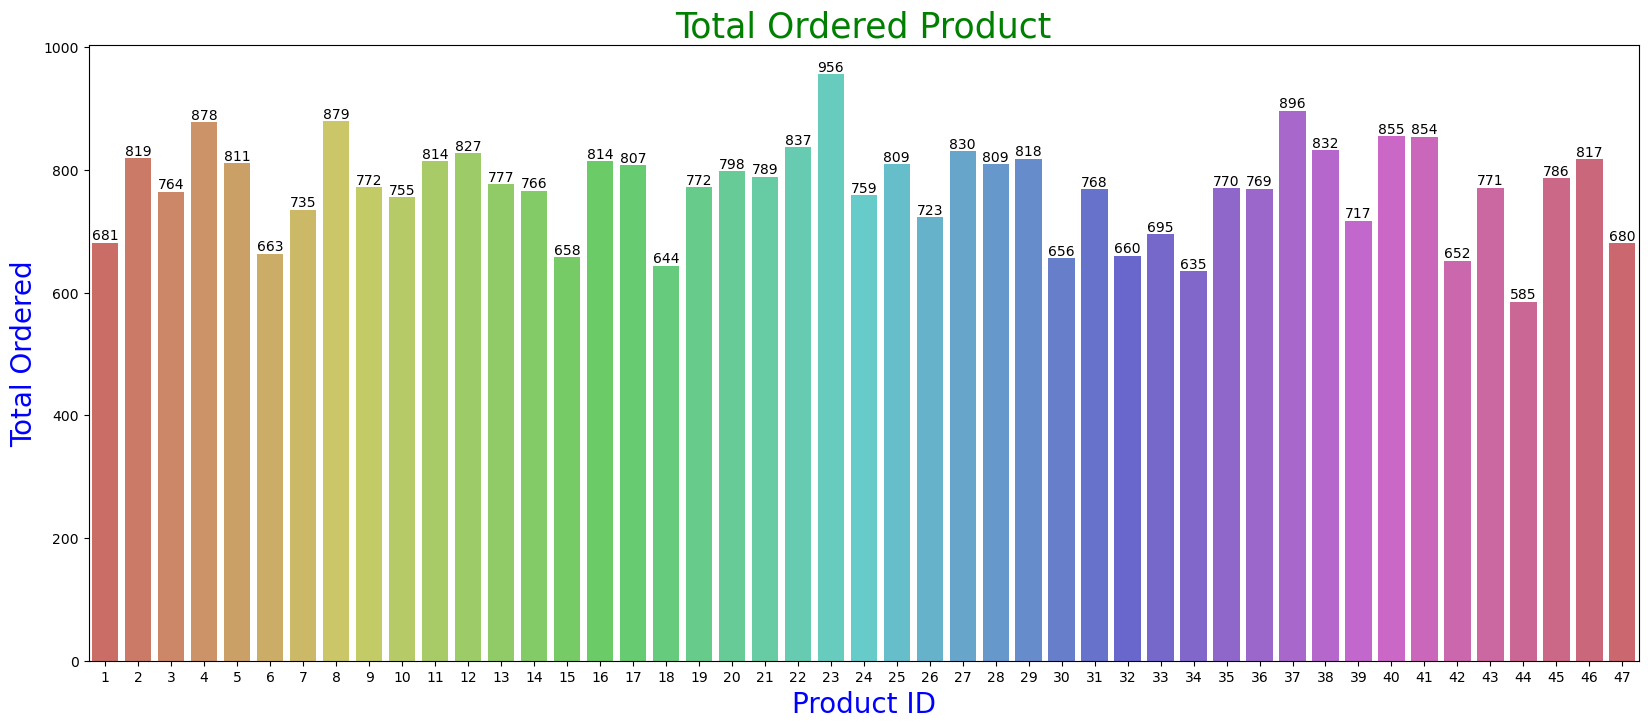

In [18]:
# total ordered product

_ProductID_unique = df['_ProductID'].unique()
print('Products ID = ',sorted(_ProductID_unique))

# total ordered product in plot
plt.rcParams['figure.figsize'] = [20, 8]
result_group_year= df.groupby(['_ProductID'])
total_by_year = result_group_year['Order Quantity'].agg([np.sum]).reset_index()
ax = sns.barplot(x = total_by_year['_ProductID'], y = total_by_year['sum'],palette = 'hls')

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d')

#title and labels
plt.title('Total Ordered Product',fontsize = 25, color='green')
plt.xlabel('Product ID',fontsize = 20,color='blue')
plt.ylabel('Total Ordered',fontsize = 20,color='blue')

plt.show

### Sales Team

Sales Team ID =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


C:\Users\Umair Ali\AppData\Local\Temp\ipykernel_10228\2486067208.py:7: FutureWarning: The provided callable <function sum at 0x000002B6E7EA71A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_by_year = group_order_year['Order Quantity'].agg([np.sum]).reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

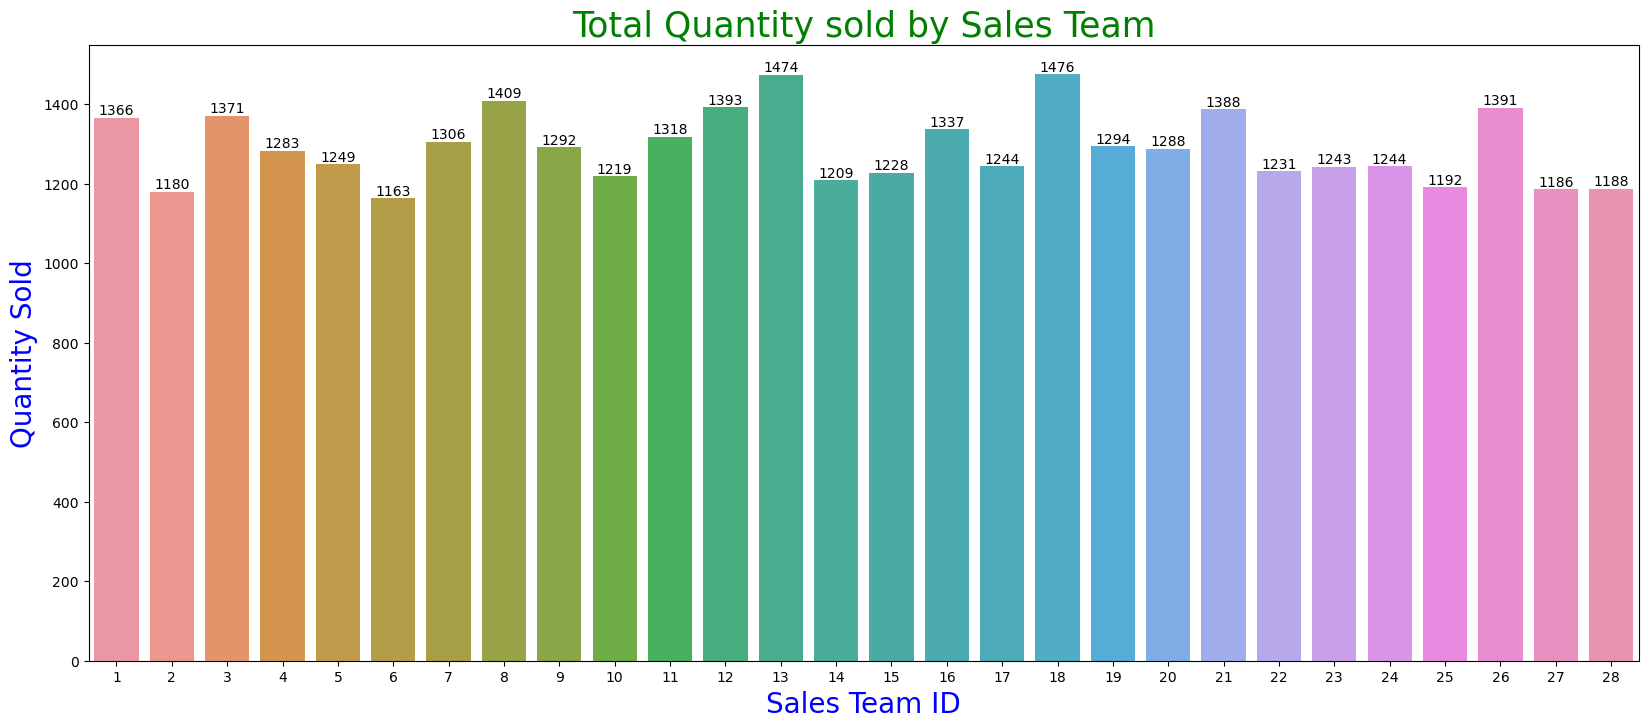

In [19]:
# Total Quantity sold by Sale Team
_SalesTeamID_unique = df['_SalesTeamID'].unique()
print('Sales Team ID = ',sorted(_SalesTeamID_unique))

# total sold product by sale team in bars
group_order_year= df.groupby(['_SalesTeamID'])
total_by_year = group_order_year['Order Quantity'].agg([np.sum]).reset_index()
ax = sns.barplot(x = total_by_year['_SalesTeamID'], y = total_by_year['sum'])

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d')

# title and labels
plt.title('Total Quantity sold by Sales Team',fontsize = 25, color='green')
plt.xlabel('Sales Team ID',fontsize = 20,color='blue')
plt.ylabel('Quantity Sold',fontsize = 20,color='blue')
plt.show

### Customers

_CustomerID =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


C:\Users\Umair Ali\AppData\Local\Temp\ipykernel_10228\27093893.py:7: FutureWarning: The provided callable <function sum at 0x000002B6E7EA71A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_by_year = group_order_year['Order Quantity'].agg([np.sum]).reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

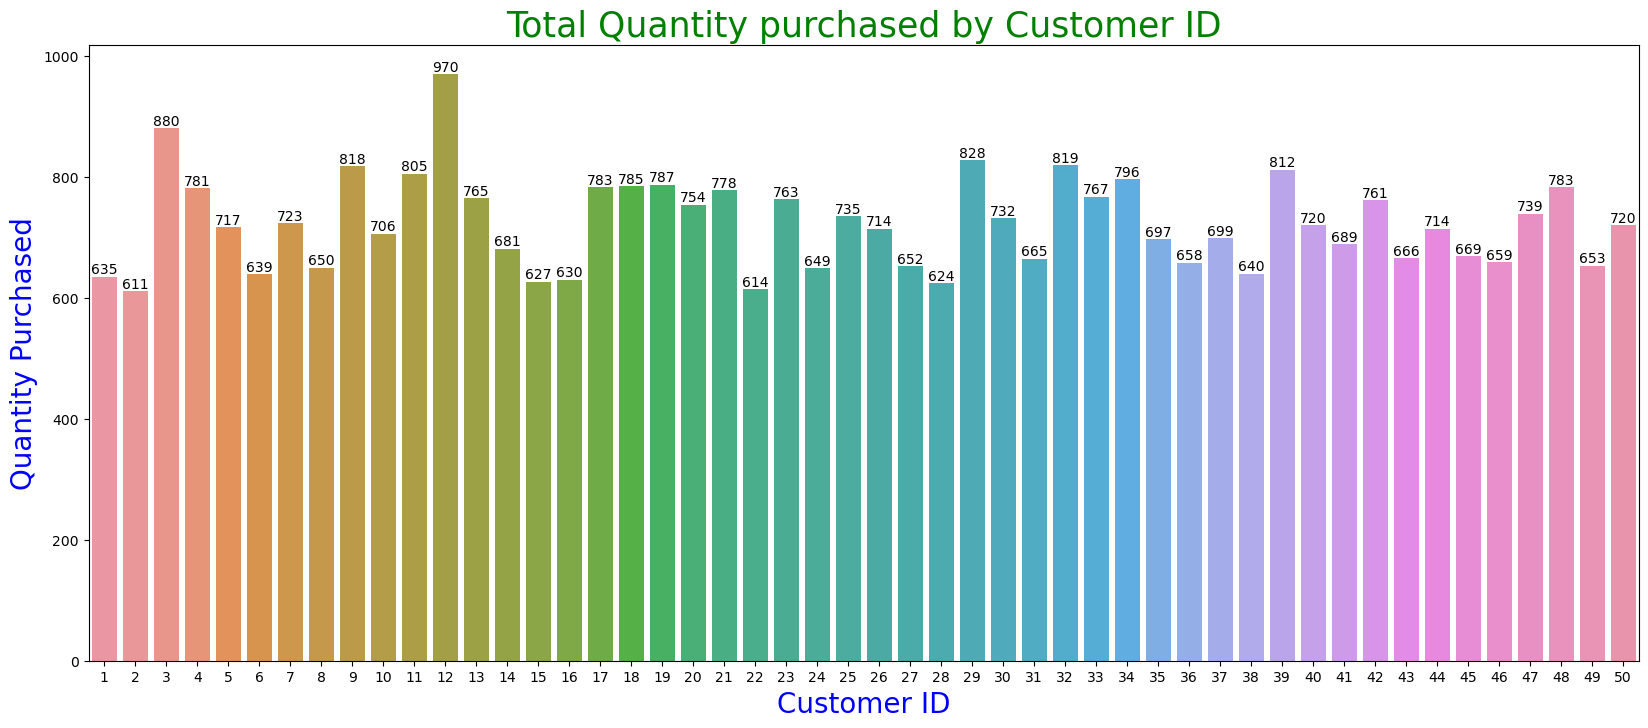

In [20]:
# Total Quantity sold by Sale Team
_CustomerID_unique = df['_CustomerID'].unique()
print('_CustomerID = ',sorted(_CustomerID_unique))

# total sold product by sale team in bars
group_order_year= df.groupby(['_CustomerID'])
total_by_year = group_order_year['Order Quantity'].agg([np.sum]).reset_index()
ax = sns.barplot(x = total_by_year['_CustomerID'], y = total_by_year['sum'])

# bar labels in complete figures
ax.bar_label(ax.containers[0], fmt = '%d')

# title and labels
plt.title('Total Quantity purchased by Customer ID',fontsize = 25, color='green')
plt.xlabel('Customer ID',fontsize = 20,color='blue')
plt.ylabel('Quantity Purchased',fontsize = 20,color='blue')
plt.show

## Split Dataframe in Train and Test

In [21]:
X = df[["Order Quantity", "Discount Applied", "Unit Cost"]]
y = df["Unit Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model - Linear Regression

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
preds = lm.predict(X_test)

In [23]:
print('Intercept: ',lm.intercept_)
print('Coefficent: ',lm.coef_)
print('Linear Regression Score: ',lm.score(X_test,y_test))

Intercept:  246.23486067663362
Coefficent:  [ 0.42118341 46.03106596  1.414467  ]
Linear Regression Score:  0.8828419944224362
